In [25]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inversion

Algorithm:
1. Simulate U[0,1]
2. Return $X \leftarrow F^{-1}(U)$

In [30]:
u = np.random.random(size=10000)

In [35]:
def inv_cdf(dist,u,**kwargs):
    match dist:
        case "exponential":
            return -1/kwargs["lam"] * np.log(1-u)
        case "cauchy":
            return kwargs["sigma"] * np.tan(np.pi * (u-0.5))
        case "pareto":
            return kwargs["b"]/(np.power(1-u,1/kwargs['a']))

/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

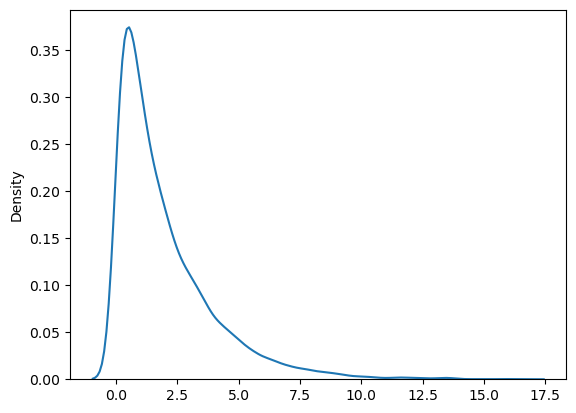

In [34]:
sample = inv_cdf(dist="exponential",u=u,lam=0.5)
sns.kdeplot(sample)

/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

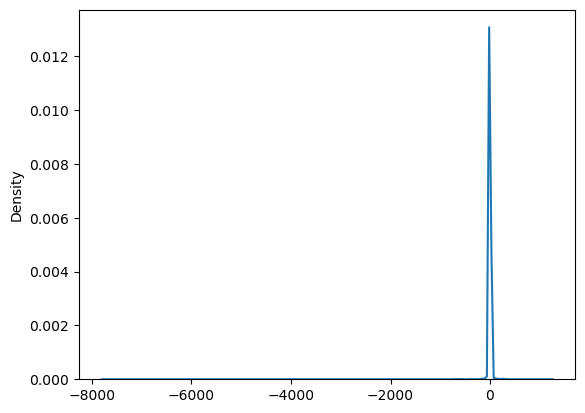

In [33]:
sample = inv_cdf(dist="cauchy",u=u,sigma=1)
sns.kdeplot(sample)

/opt/miniconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

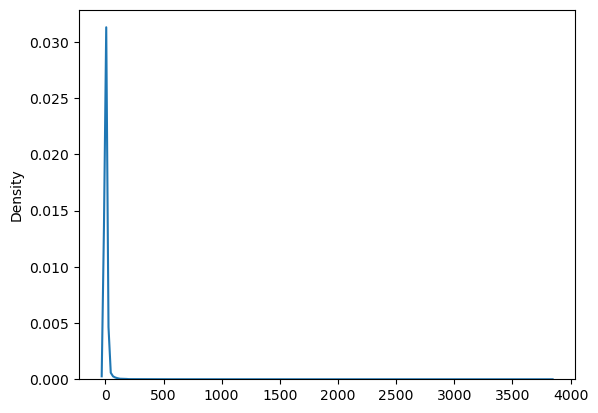

In [36]:
sample = inv_cdf(dist="pareto",u=u,a=1,b=1)
sns.kdeplot(sample)

Generating Maxima/Order Statistics

You can generate maxima using 3 methods:

1. Generate non-uniform sample and take max
2. Generate 1 uniform and invert $F^n$
3. Generate uniform sample, take max, then invert

Order statistics can be generated using order statistics of uniform sample and inverting. 

# Rejection